# Datensatzbeschreibung
## Gruppe Altendorfer, Eckmayr

Datensatz: StudentsPerformance

Der von uns gewählte Datensatz enthält Daten zu Ergebnissen in den Fächern Mathematik, Lesen und Schreiben von 1000 US-amerikanischen Highschool Schülern. Wir möchten in der weiteren Analyse untersuchen, ob Zusammenhänge zwischen einzelnen/mehreren Faktoren und den erzielten Testergebnissen hergestellt und durch die angegeben Features der Test Score vorhergesagt werden kann sowie welche Variablen die größte Signifikanz aufweisen.
Der Datensatz ist auf [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) verfügbar.

### Konkret sind folgende Variablen enthalten:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StudentsPerformance.csv")

variablen = df.columns.tolist()
print(variablen)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Ein näherer Blick auf die jeweiligen Werte der Variablen:

In [12]:
exclude = ["math score", "reading score", "writing score"]

for variable in df:
    if variable not in exclude:
        print(f"{variable}: {df[variable].unique()}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


### Zusammenfassung des Datensatzes:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Forschungsfragen

Aus dem vorliegenden Datensatz können einige spannende Forschungsfragen abgeleitet werden. Wir wollen in unserer Analyse einige Variablen herausgreifen und diese hinsichtlich der erzielten Testergebnisse beurteilen und die Resultate visualisieren. Beispielhaft für das Geschlecht:

C:\Users\fabia\AppData\Local\Temp\ipykernel_8100\3083268956.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


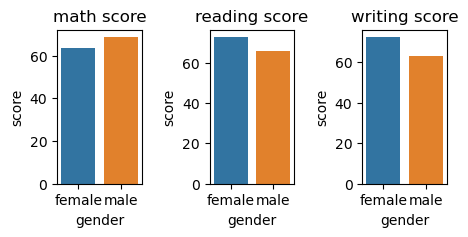

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,2))
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(x=gender_df.index, y=gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()


### Forschungsfrage 1
Kann ein Unterschied zwischen den ethnischen Gruppen in den erzielten Prüfungsergebnissen beobachtet werden?

### Forschungsfrage 2
Beeinflusst das Bildungsniveau der Eltern die Wahrscheinlichkeit einen Vorbereitungskurs zu absolvieren und wirkt sich die Absolvierung eines solchen auf die Prüfungsergebnisse aus?

### Forschungsfrage 3
Besteht ein statistisch signifikanter Zusammenhang zwischen der Bereitstellung eines Mittagessens und den Leistungen in Prüfungen, wobei höhere Prüfungsergebnisse bei Schülern beobachtet werden, die Zugang zu einem Mittagessen haben, im Vergleich zu Schülern ohne diesen Zugang?

### Forschungsfrage 4 - Machine Learning
Kann unter Verwendung der Variablen 'Parental Level of Education', 'Lunch' und 'Test Preperation Course' mittels einer ausgewählten Machine Learning Methode die Note des Prüfungsergebnisses vorhergesagt werden, wobei die Prüfungsergebnisse in Noten nach dem österreichischen Schulsystem (1-5) eingeteilt werden?